## This google colab notebook introduces basic Image Processing Methods such as Image Histogram, Intensity Transformation, Thresholding and Filtering. Use the following drive link to access the images.
https://drive.google.com/open?id=1QC910Yh70rkaUm9B3fLEJQRQMCbNkw9h


## Mounting the google drive and loading requried libraries

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go

## Various ways of reading images

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/lena.png')
print (I.shape)


(512, 512, 3)


(137, 137, 4)


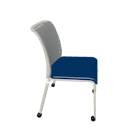

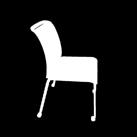

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/chair.png', cv2.IMREAD_UNCHANGED)
print (I.shape)
cv2_imshow(I)
cv2_imshow(I[:,:,3])

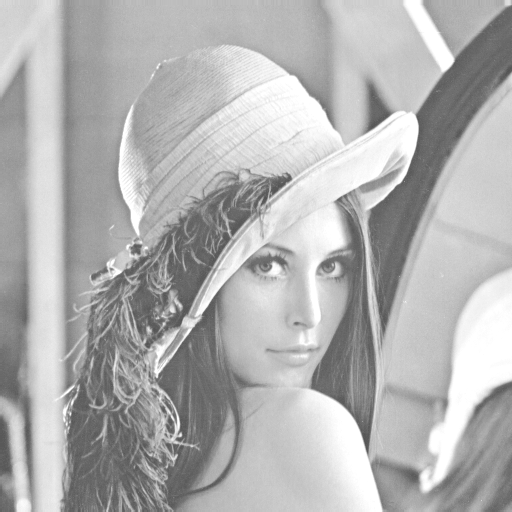

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/lena.png', cv2.IMREAD_GRAYSCALE)
# need to change to int64
I = I.astype('int64')
I += 45
# Boundaries
I[I > 255] = 255
I = I.astype('uint8')
cv2_imshow(I)


In [0]:
def gamma_transform(image, gamma):
  transformed_img = image.astype('int64')
  transformed_img = (transformed_img/255)**gamma
  transformed_img = transformed_img * 255
  return transformed_img.astype('uint8')

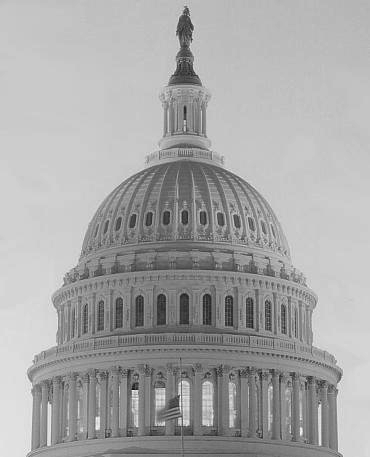

In [0]:
gamma = 1.5
I = cv2.imread('/content/drive/My Drive/Image Processing/gamma1.jpg')
cv2_imshow(gamma_transform(I, gamma))

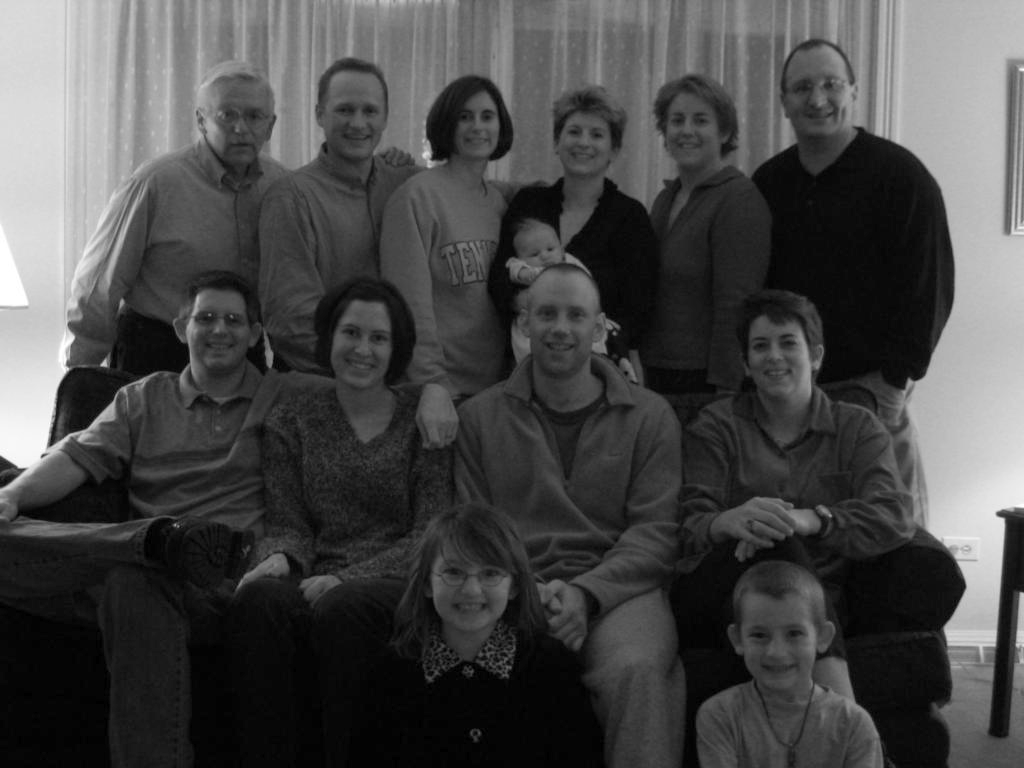

In [0]:
gamma = 0.8
I = cv2.imread('/content/drive/My Drive/Image Processing/gamma2.jpg')
cv2_imshow(gamma_transform(I, gamma))

## Greyscale histogram

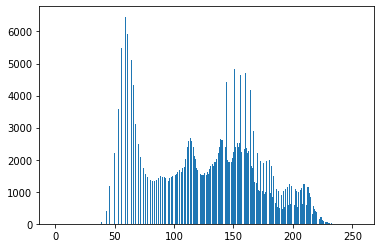

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/lena.png', cv2.IMREAD_GRAYSCALE)
def plot_grayscale_hist(I):
  num_pixels = [0 for i in range(256)]
  for i in I.flatten():
    num_pixels[i]+=1
  plt.bar(range(256), num_pixels)

plot_grayscale_hist(I)

# Color Histogram

In [0]:
def plot_color_hist(image):
  plt.hist(image[:,:,0].flatten(), bins = 256, color="red")
  plt.hist(image[:,:,1].flatten(), bins = 256, color="green")
  plt.hist(image[:,:,2].flatten(), bins = 256, color="blue")    
  plt.show()

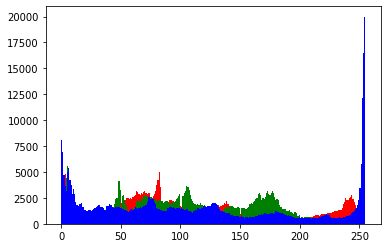

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/lotus.jpg')
plot_color_hist(I)

## Image Thresholding

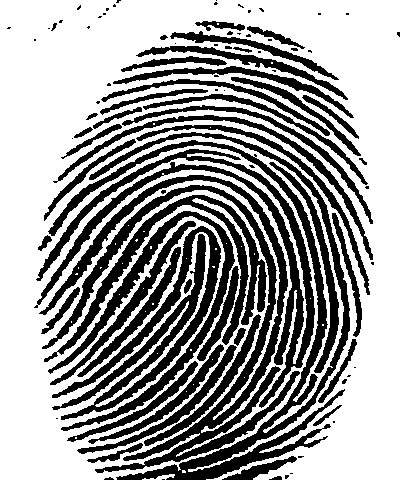

In [0]:
def threshold(image, thresh):
    return ((image>thresh) * 255).astype('uint8')

I = cv2.imread('/content/drive/My Drive/Image Processing/FingerPrint.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(threshold(I,128))



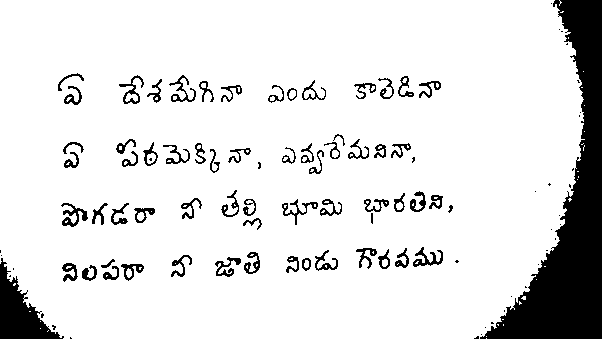

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/text.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(threshold(I,90))

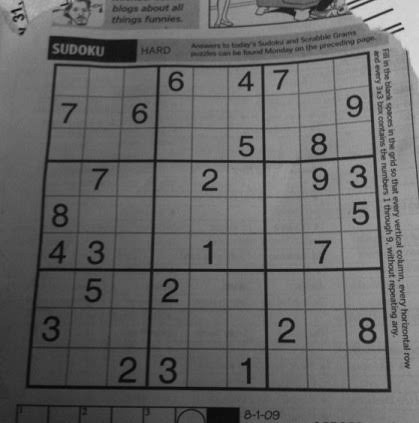

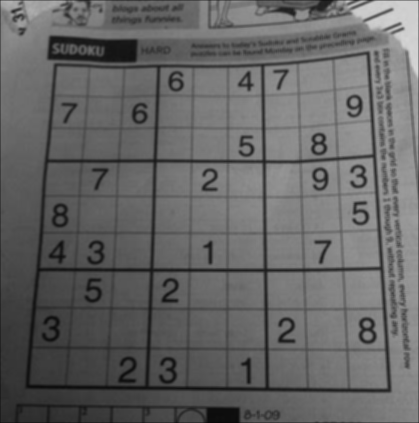

In [0]:
def convolve(image, filt):
  img_cpy = np.zeros(image.shape)
  for u in range(image.shape[0]):
    for v in range(image.shape[1]):
      for i in [-1,0,1]:
        for j in [-1, 0, 1]:
          if(0<=u+i and u+i<image.shape[0] and v+j>=0 and v+j<image.shape[1]):
            img_cpy[u+i ,v+j] += image[u,v]*filt[i+1,j+1]
  return img_cpy
f = np.array([[1,1,1],[1,1,1],[1,1,1]])/9
I = cv2.imread('/content/drive/My Drive/Image Processing/sudoku.jpeg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(I)
cv2_imshow(convolve(I, f))


## Ex 3: Count the number of windows in image 'window.jpeg'.


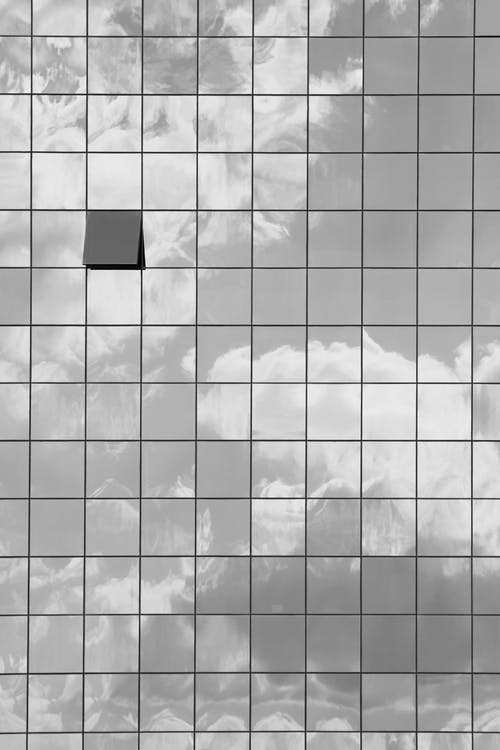

Number of windows
140


In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/window.jpeg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(I)

sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
x_filtered = cv2.filter2D(I,-1,sobel_x)
x_filtered = threshold(x_filtered, 150)
x_filtered = x_filtered.astype('int64')

sobel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
y_filtered = cv2.filter2D(I,-1,sobel_y)
y_filtered = threshold(y_filtered, 120)
y_filtered = y_filtered.astype('int64')


x_filtered =np.average(x_filtered, axis = 0)
y_filtered = np.average(y_filtered, axis = 1)

num_x = 0
num_y = 0

flag = 1
thresh = 50
for val in x_filtered:
  if(val > thresh):
    if(flag == 1):
      num_x+=1
      flag = 0
  else:
    if(flag == 0):
      flag = 1

flag = 1
for val in y_filtered:
  if(val > thresh):
    if(flag == 1):
      num_y+=1
      flag = 0
  else:
    if(flag == 0):
      flag = 1
print("Number of windows")
print((num_x + 1)* (num_y + 1))

# Opening and closing

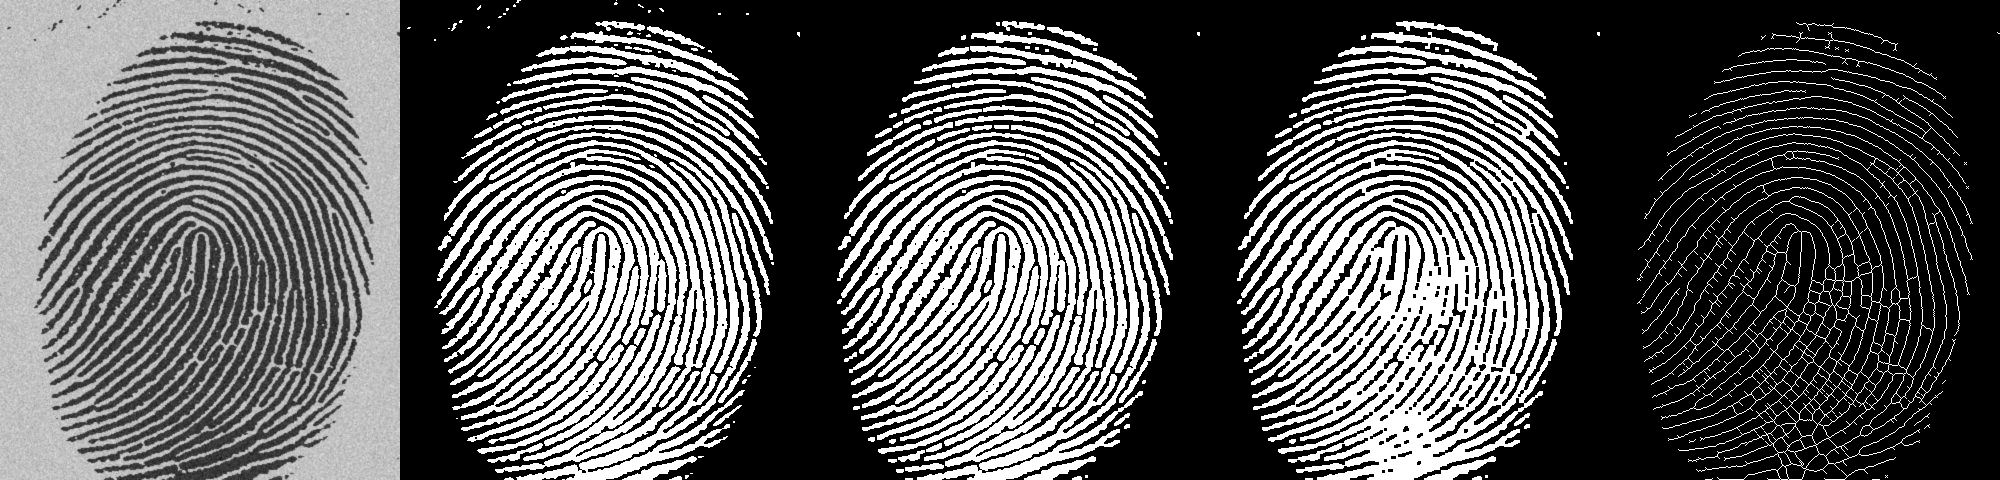

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/FingerPrint.jpg', cv2.IMREAD_GRAYSCALE)
_,binary = cv2.threshold(I,125,255,cv2.THRESH_BINARY_INV)
structural_element = morp.square(3,dtype='uint8')
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, structural_element)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, structural_element)
closing2 = closing/255
final = morp.medial_axis(closing2)*255
cv2_imshow(np.hstack([I, binary, opening, closing, final]))

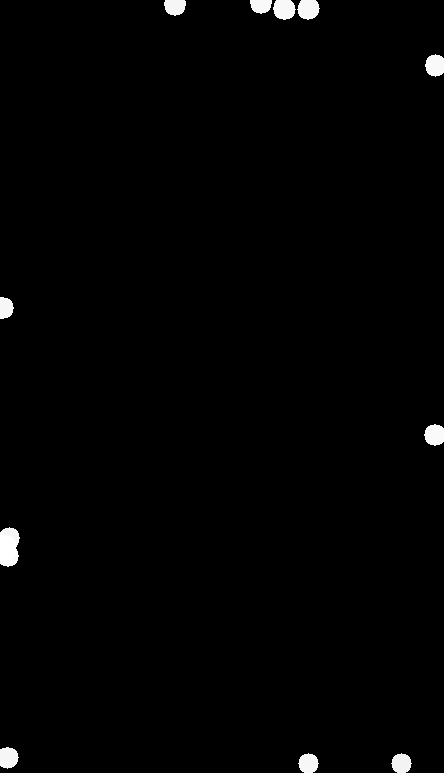

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/coins.jpg', cv2.IMREAD_GRAYSCALE)
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
se = morp.disk(10)
I1 = cv2.erode(I, se)
I1[10:I1.shape[0] - 10, 10:I1.shape[1] - 10] = 0
I1 = cv2.dilate(I1, se)
cv2_imshow(I1)


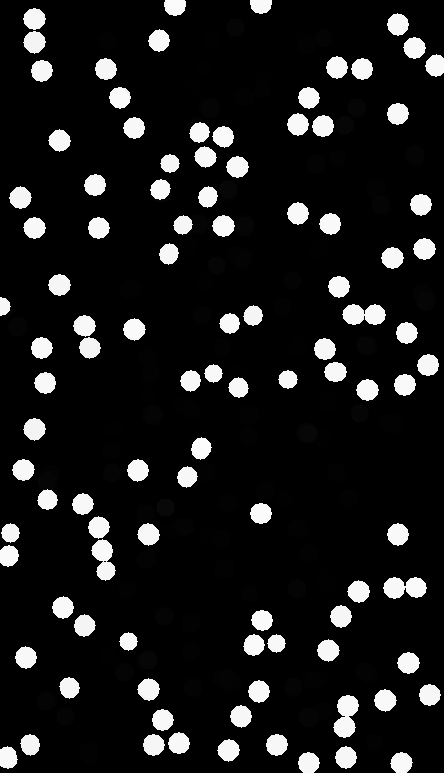

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/coins.jpg', cv2.IMREAD_GRAYSCALE)
# I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
kernel = np.full((22, 22), 0)
kernel[2:-1, 2:-1]  = morp.disk(9)
kernel[0, 21] = -1
kernel[21, 0] = -1
kernel[21, 21] = -1
kernel[0, 0] = -1

I1  = cv2.morphologyEx(I, cv2.MORPH_HITMISS, kernel)
I1 = cv2.dilate(I1, morp.disk(9))
cv2_imshow(I1)

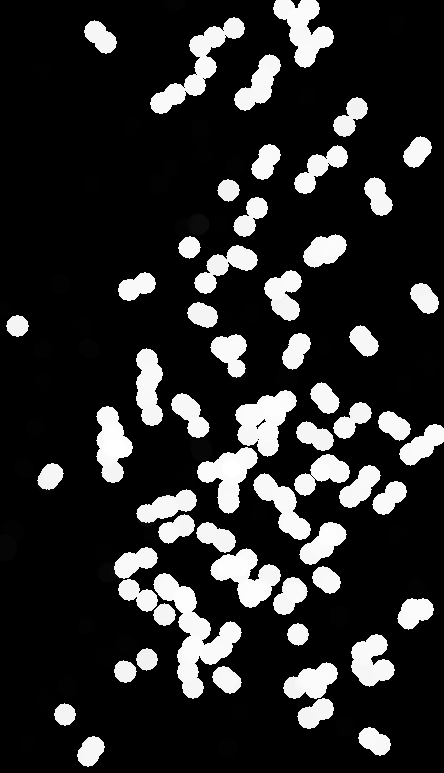

In [0]:
I = cv2.imread('/content/drive/My Drive/Image Processing/coins.jpg', cv2.IMREAD_GRAYSCALE)
# I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
kernel = np.full((21, 21), 0)
kernel[2:, 2:]  = morp.disk(9)
kernel[0, 20] = -1
kernel[20, 0] = -1
kernel[20, 20] = -1
kernel[0, 0] = -1

I1  = cv2.morphologyEx(I, cv2.MORPH_HITMISS, kernel)
I1 = cv2.dilate(I1, morp.disk(9))
I1 = I - I1
I1 = cv2.erode(I1, morp.disk(9))
I1 = cv2.dilate(I1, morp.disk(9))


# cv2.morphologyEx(I1, cv2.MORPH_CLOSE,morp.disk(9))
cv2_imshow(I1)

# Chroma key

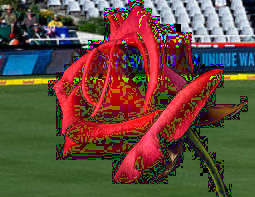

In [0]:
chroma = cv2.imread("/content/drive/My Drive/images/stadium.jpg")
chroma_key = cv2.imread("/content/drive/My Drive/Image Processing/rose.jpeg")
rows = min(chroma.shape[0], chroma_key.shape[0])
cols = min(chroma.shape[1], chroma_key.shape[1])
chroma = chroma[0:rows, 0:cols]
chroma_key = chroma_key[0:rows, 0:cols]
outputImage = np.where(chroma_key == chroma_key[0][0]  , chroma, chroma_key)
cv2_imshow(outputImage)

# Face align

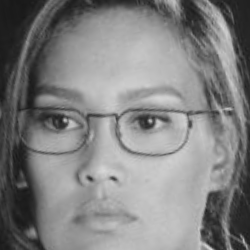

In [0]:
face = cv2.imread("/content/drive/My Drive/Image Processing/face.jpg")
h, w = face.shape[:2]

left_eye = np.array([100, h-100])
right_eye = np.array([152, h-111])
nose = (115, h-133)

def angle(a, b):
    d = np.dot(a, b)
    d /= np.linalg.norm(a)
    d /= np.linalg.norm(b)
    return np.rad2deg(np.arccos(d))

eye_line = right_eye - left_eye
eye_hori = np.array([right_eye[0], left_eye[1]]) - left_eye
scale = 1.6

M = cv2.getRotationMatrix2D(nose, angle(eye_line, eye_hori), scale)
M[0][-1] -= w/10
M[1][-1] += h/10

straight = cv2.warpAffine(face, M, (w, h))

cv2_imshow(straight)

# Homography

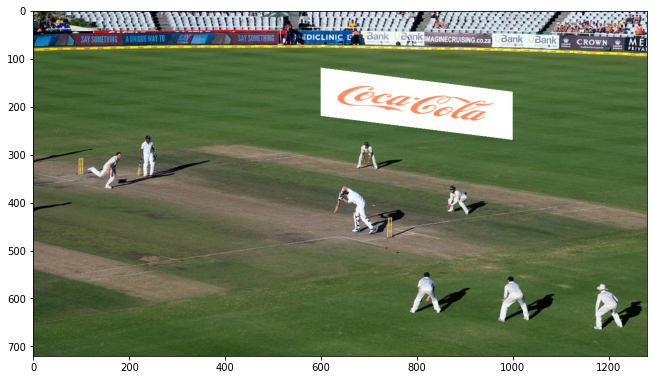

In [0]:
stadium = cv2.imread("/content/drive/My Drive/Image Processing/stadium.jpg")
coke = cv2.imread("/content/drive/My Drive/Image Processing/coca.jpg")


cola_pts = np.float32([[0,0],[0,179],[320, 0],[320,179]])
stadium_pts = np.float32([[600,120],[600, 220],[1000, 170],[1000, 270]])

h, w = stadium.shape[:2]

H, status = cv2.findHomography(cola_pts, stadium_pts)
coke_warp = cv2.warpPerspective(coke, H, (stadium.shape[1], stadium.shape[0]))

res = cv2.add(stadium, coke_warp)

fig = plt.figure(figsize = (11,11))
plt.imshow(cv2.cvtColor(res, cv2.COLOR_RGB2BGR))